In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [1]:
movie_data  = sc.textFile("ml-100k/u.item")

In [2]:
movie_data.take(5)

[u'1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0',
 u'2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0',
 u'3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0',
 u'4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0',
 u'5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0']

In [3]:
total_movies = movie_data.count()

In [5]:
print("Total number of movies : {}".format(total_movies))

Total number of movies : 1682


In [6]:
#Functiont to handle bad year 

def convert_year(x):
    try:
        return(x[-4:])
    except:
        return 1900 #if the year is bad we are setting to 1900

In [19]:
movie_feilds = movie_data.map(lambda feilds : feilds.split("|"))
years = movie_feilds.map(lambda feilds: feilds[2]).map(lambda year : convert_year(year))

In [20]:
years.first()

u'1995'

In [24]:
years_valid = years.filter(lambda valid : valid != 1900)

In [26]:
no_of_releases_year = years_valid.map(lambda x : x).countByValue()

In [85]:
movie_year = [key for key in no_of_releases_year.keys()]
no_of_movies = no_of_releases_year.values()

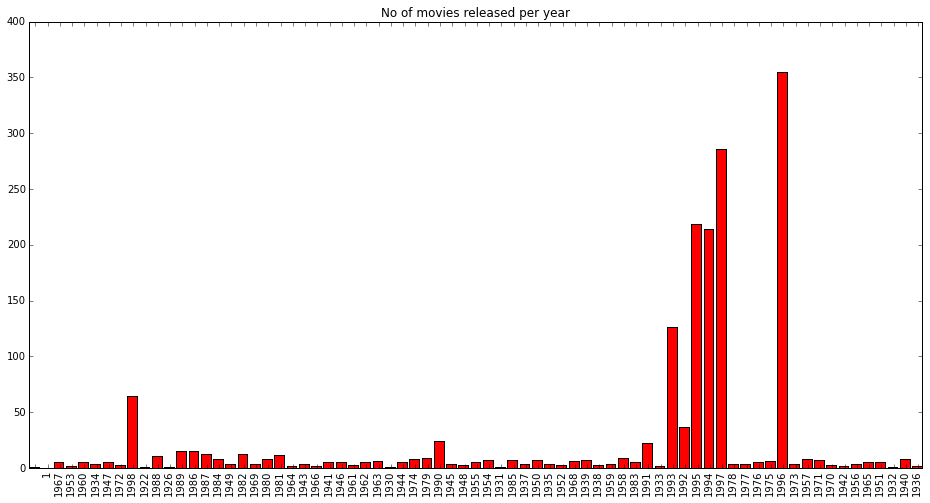

In [87]:
pos = np.arange(len(movie_year))

ax = plt.axes()
ax.set_xticks(pos + 0.5)
ax.set_xticklabels(movie_year)


plt.bar(pos,no_of_movies,color = "red")
plt.xticks(rotation = 90)
plt.title("No of movies released per year")

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 8)